In [2]:
# Statistika Deskriptif dengan menggunakan Scipy
import numpy as np
from scipy import stats

data = np.loadtxt("https://storage.googleapis.com/dqlab-dataset/survei_tinggi_badan.txt",skiprows=1)
stats_desc = stats.describe(data)
print(stats_desc)

DescribeResult(nobs=250, minmax=(143.0, 177.0), mean=161.352, variance=36.32539759036145, skewness=-0.13124444608329433, kurtosis=-0.044516092057662604)


Penjelasan lebih lanjut mengenai scipy.stats.describe : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html

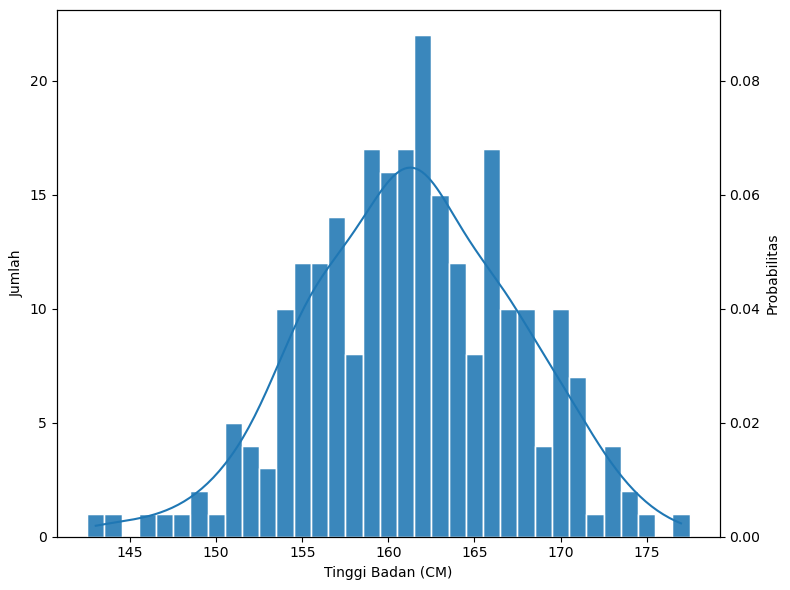

In [13]:
# Visualisasi Histogram
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax = plt.subplots(figsize=(8,6))

sns.histplot(x=data,binwidth=1,binrange=(data.min()-0.5,data.max()+0.5),ec="w",ax=ax)
ax2 = ax.twinx()
sns.histplot(x=data,stat="probability",binwidth=1,binrange=(data.min()-0.5,data.max()+0.5),kde=True,ec="w",ax=ax2)
ax.set_xlabel("Tinggi Badan (CM)")
ax.set_ylabel("Jumlah")
ax2.set_ylabel("Probabilitas")
plt.tight_layout()

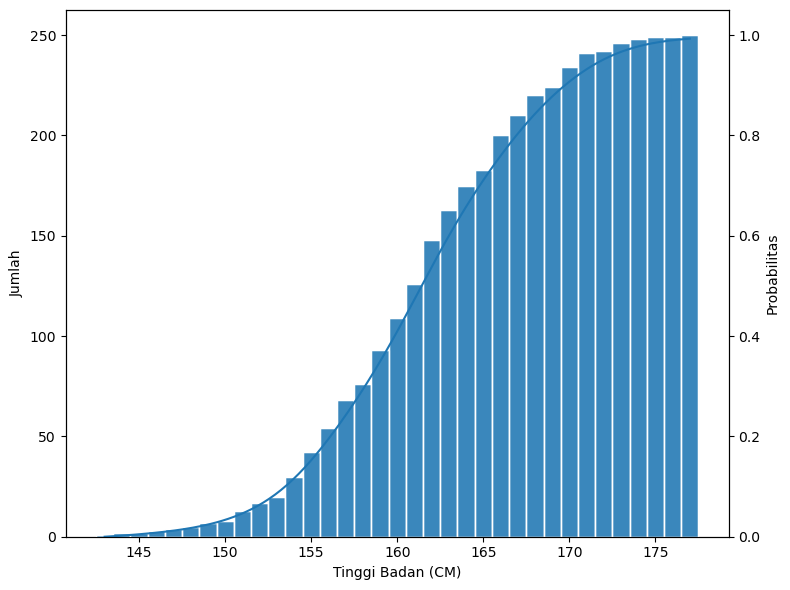

In [14]:
# Membuat histogram kumulatif
fig,ax = plt.subplots(figsize=(8,6))

sns.histplot(x=data,binwidth=1,binrange=(data.min()-0.5,data.max()+0.5),ec="w",ax=ax,cumulative=True)
ax2 = ax.twinx()
sns.histplot(x=data,stat="probability",binwidth=1,binrange=(data.min()-0.5,data.max()+0.5),kde=True,ec="w",ax=ax2,cumulative=True)
ax.set_xlabel("Tinggi Badan (CM)")
ax.set_ylabel("Jumlah")
ax2.set_ylabel("Probabilitas")
plt.tight_layout()

Text(0, 0.5, 'Probabilitas Kumulatif')

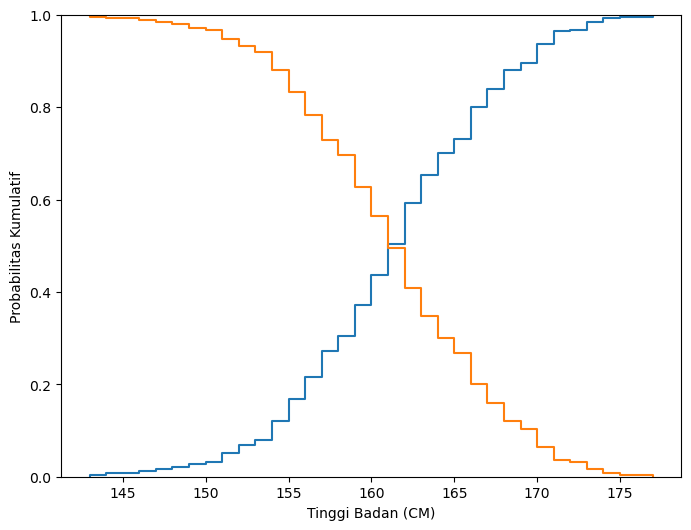

In [19]:
# Membuat visualisasi cdf (cumulative density function) dan komplemennya
fig, ax  = plt.subplots(figsize=(8,6))
sns.ecdfplot(x=data,ax= ax)
sns.ecdfplot(x=data,complementary=True,ax=ax)
ax.set_xlabel("Tinggi Badan (CM)")
ax.set_ylabel("Probabilitas Kumulatif")

<Axes: xlabel='Tinggi Badan (CM)', ylabel='Probabilitas Kumulatif'>

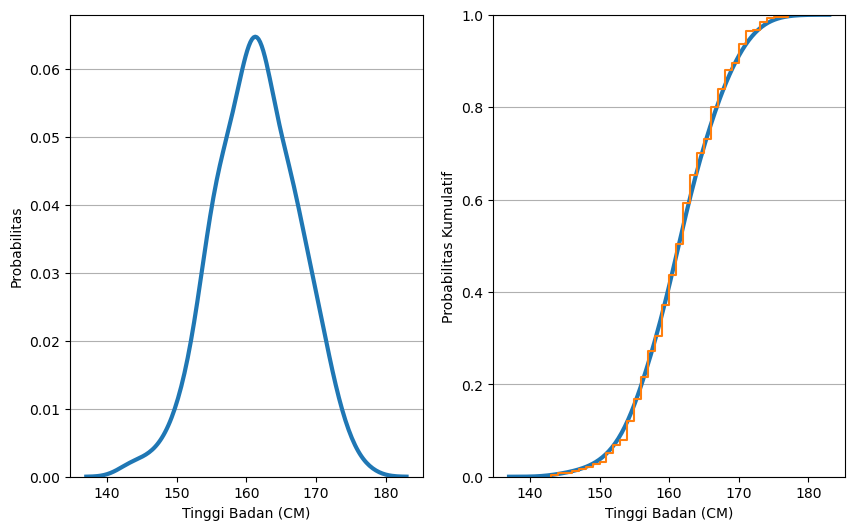

In [13]:
# Membuat 2 macam grafik : cdf dan pdf (probability density function)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("https://storage.googleapis.com/dqlab-dataset/survei_tinggi_badan.txt",skiprows=1)
fig, ax = plt.subplots(1,2,figsize=(10,6))
sns.kdeplot(x=data,ax=ax[0],lw=3)
sns.kdeplot(x=data,ax=ax[1],lw=3,cumulative=True)
for a in ax :
    a.set_xlabel("Tinggi Badan (CM)")
    a.grid(axis='y')
ax[0].set_ylabel("Probabilitas")
ax[1].set_ylabel("Probabilitas Kumulatif")
sns.ecdfplot(x=data,ax=ax[1])

In [9]:
# Mencari pdf dan cdf dari suatu nilai
import numpy as np
from scipy.stats import norm

data = np.loadtxt("https://storage.googleapis.com/dqlab-dataset/survei_tinggi_badan.txt", skiprows=1)
rata_rata = data.mean()
std = data.std(ddof=0)
nilai_pdf_165 = norm.pdf(x=165,loc=rata_rata,scale=std)
nilai_cdf_165 = norm.cdf(x=165,loc=rata_rata,scale=std)
print("Nilai PDF dari 165 =",nilai_pdf_165)
print("Nilai CDF dari 165 =",nilai_cdf_165)

Nilai PDF dari 165 = 0.05518274033375044
Nilai CDF dari 165 = 0.7279035874184356


In [10]:
# Mencari pdf dan cfd dari 2 nilai
x = [140,180]
rata_rata = data.mean()
std = data.std(ddof=0)
pdf = norm.pdf(x,loc=rata_rata,scale=std)
cdf = norm.cdf(x,loc=rata_rata,scale=std)
for item, pdf, cdf in zip(x,pdf,cdf) :
    print("Probabilitas dari x = %d adalah %.4f." % (item,pdf))
    print("Probabilitas Kumulatif dari x = %d adalah %.4f." % (item,cdf))

Probabilitas dari x = 140 adalah 0.0001.
Probabilitas Kumulatif dari x = 140 adalah 0.0002.
Probabilitas dari x = 180 adalah 0.0005.
Probabilitas Kumulatif dari x = 180 adalah 0.9990.


Text(0.5, 0, 'Probabilitas Kumulatif')

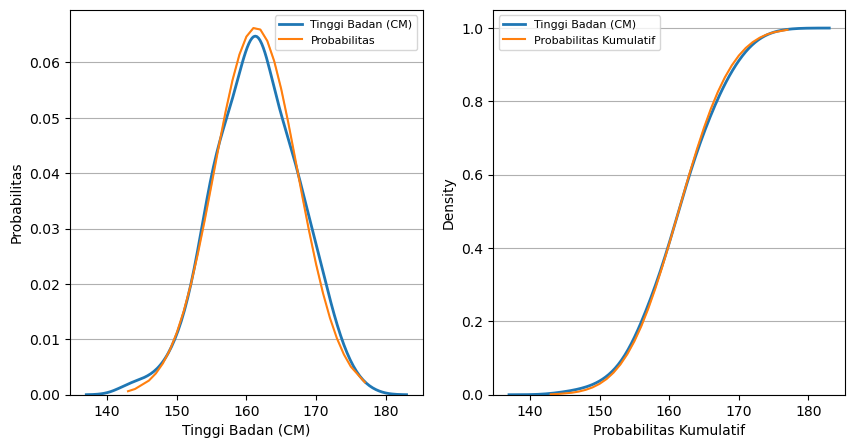

In [26]:
# Visualisasi perbandingan cdf dan pdf yang terdistribusi normal dan yang belum
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.kdeplot(data,lw=2,ax=ax[0])
sns.lineplot(x=data,y=norm.pdf(data,loc=data.mean(),scale=data.std(ddof=0)),ax=ax[0])
sns.kdeplot(data,cumulative=True,lw=2,ax=ax[1])
sns.lineplot(x=data,y=norm.cdf(data,loc=data.mean(),scale=data.std(ddof=0)),ax=ax[1])
ax[0].legend(["Tinggi Badan (CM)","Probabilitas"],fontsize=8)
ax[1].legend(["Tinggi Badan (CM)","Probabilitas Kumulatif"],fontsize=8)
for axs in ax :
    axs.set_xlabel("Tinggi Badan (CM)")
    axs.grid(axis="y")
ax[0].set_ylabel("Probabilitas")
ax[1].set_xlabel("Probabilitas Kumulatif")

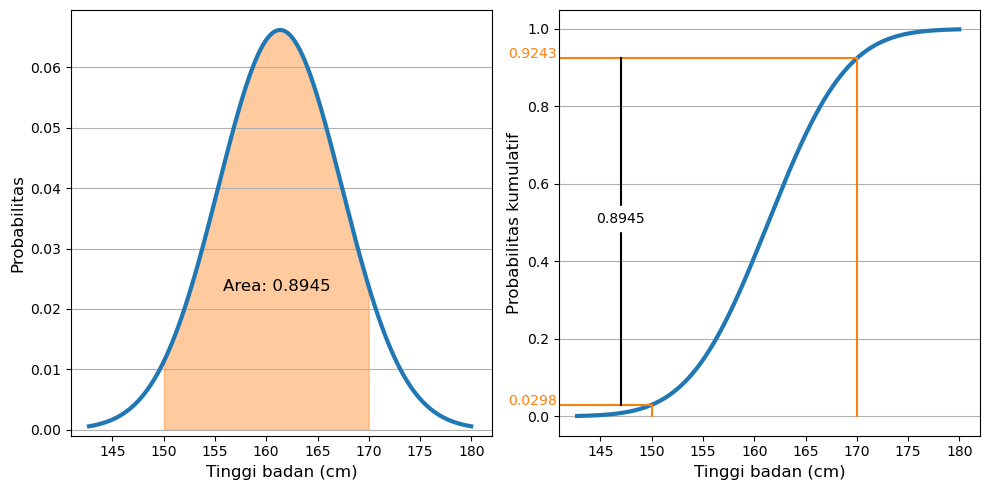

In [27]:
# Visualisasi cdf dan edf yang sudah berdistribusi normal

# Gunakan kutip dua untuk setiap string
import numpy as np
# Import matplotlib.pyplot dan seaborn sebagai aliasnya
# dan importlah norm dari scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Baca data survei_tinggi_badan.txt dengan numpy loadtxt
tinggi_badan = np.loadtxt("https://storage.googleapis.com/dqlab-dataset/survei_tinggi_badan.txt", skiprows=1)

# Rata-rata dan standar deviasi unbiased tinggi_badan
tb_mean = tinggi_badan.mean()
tb_std = tinggi_badan.std(ddof=1)
# Buat data tinggi badan yang terdistribusi normal dengan 
# rata-rata pada tb_mean dan standar deviasi unbiased pada tb_std
# untuk menghasilkan 1001 titik data baru berdasarkan nilai kuantilnya
tb = np.linspace(norm.ppf(0.001, loc=tb_mean, scale=tb_std), 
                 norm.ppf(0.999, loc=tb_mean, scale=tb_std), 1001)
# kurva pdf dan kurva cdf berdasarkan data tb
pdf_tb = norm.pdf(tb, loc=tb_mean, scale=tb_std)
cdf_tb = norm.cdf(tb, loc=tb_mean, scale=tb_std)
# Nilai probabilitas dan probabilitas kumulatif menggunakan 
# distribusi normal untuk tinggi badan, 150 cm dan 170 cm
x = [150,170]
pdf_x = norm.pdf(x, loc=tb_mean, scale=tb_std)
cdf_x = norm.cdf(x, loc=tb_mean, scale =tb_std)
				 
# Buat figure sebagai canvas dengan ukuran 10 in x 5 in
# dengan dua suplots (2 kolom)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# plotkan kurva pdf_tb pada subplot pertama: axs[0]
sns.lineplot(x=tb, y=pdf_tb, lw=3, ax=axs[0])
axs[0].fill_between(tb[(tb>=x[0]) & (tb<=x[1])], 
                    pdf_tb[(tb>=x[0]) & (tb<=x[1])], 
                    color="tab:orange", alpha=0.4)
axs[0].text(161, 0.023, "Area: %.4f" % (cdf_x[1]-cdf_x[0]), ha="center", fontsize=12)

# plotkan kurva cdf_tb pada subplot kedua: axs[1]
sns.lineplot(x=tb, y=cdf_tb, lw=3, ax=axs[1])
for i, _x in enumerate(x):
    axs[1].plot([_x, _x], [0, cdf_x[i]], color="tab:orange")
    axs[1].plot([140, _x], [cdf_x[i], cdf_x[i]], color="tab:orange")
    axs[1].text(140.8, cdf_x[i], "%.4f" % cdf_x[i], color="tab:orange", ha="right")
    
axs[1].plot([147, 147], cdf_x, color="black")
axs[1].text(147, 0.5, "%.4f" % (cdf_x[1]-cdf_x[0]), color="black", ha="center", backgroundcolor="white")

# set label
axs[0].set_ylabel("Probabilitas", fontsize=12)
axs[0].set_ylim(bottom=-0.001)
for ax in axs:
    ax.set_xlabel("Tinggi badan (cm)", fontsize=12)
    ax.set_xlim([141,182])
    ax.grid(axis="y")
ax.set_ylabel("Probabilitas kumulatif", fontsize=12)
plt.tight_layout()
plt.show()


In [28]:
# Problem 2 : Mencari luas area di bawah kurva, berdasarkan standar deviasi
import numpy as np
from scipy.stats import norm

tinggi_badan = np.loadtxt("https://storage.googleapis.com/dqlab-dataset/survei_tinggi_badan.txt", skiprows=1)

tb_mean = tinggi_badan.mean()
tb_std = tinggi_badan.std(ddof=1)

for i in range(1, 4):
    x = tb_mean + np.array([-i, i]) * tb_std
    cdf_x = norm.cdf(x, loc=tb_mean, scale=tb_std)
    print("Area di bawah kurva pdf (%ds s/d %ds)" % (-i, i))
    print("  pdf(%.4f <= x <= %.4f) = %.4f.\n" % (*x, np.diff(cdf_x)))

Area di bawah kurva pdf (-1s s/d 1s)
  pdf(155.3249 <= x <= 167.3791) = 0.6827.

Area di bawah kurva pdf (-2s s/d 2s)
  pdf(149.2979 <= x <= 173.4061) = 0.9545.

Area di bawah kurva pdf (-3s s/d 3s)
  pdf(143.2708 <= x <= 179.4332) = 0.9973.

